In [1]:
from sklearn.metrics import ConfusionMatrixDisplay 
import matplotlib.pyplot as plt

In [7]:
from cheetah.multiclass.data import multiclass_balancer, get_augmented_and_test
from cheetah import data
from cheetah.params import *
from cheetah.mlflow import MLFlowBase
from cheetah.multiclass.pipeline import prepare_dataset, tf_train_val_split
from cheetah.utils import configure_for_performance

In [3]:
import tensorflow.keras.models as tfkm

2022-06-23 11:19:27.009887: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-23 11:19:27.010049: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
def load_model():
    print("loading model: ")
#    if not 'model' in globals():
    #json_file = open(os.path.join('models', 'model_architecture.json'), 'r')
    #json_savedModel= json_file.read()
    #return tfkm.model_from_json(json_savedModel)
    model = tfkm.load_model('/home/noname/code/dncampo42/cheetah/models/ResNet50_finetuned_20220621_191452.h5')
    return model

#pre trained model to do predictions

model = load_model()

loading model: 


2022-06-23 11:19:31.413578: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-23 11:19:31.413678: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (tesla): /proc/driver/nvidia/version does not exist
2022-06-23 11:19:31.414916: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 90, 120, 3)]      0         
                                                                 
 resnet50 (Functional)       (None, 3, 4, 2048)        23587712  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 1)                 2049      
                                                                 
Total params: 23,589,761
Trainable params: 23,536,641
Non-trainable params: 53,120
_________________________________________________________________


In [26]:
# load original data and get corresponding image paths

df = data.get_data()
df = data.path_to_metadata(df)
# load multiclass augmented images and prepare test list
aug_test_dict = get_augmented_and_test()

# balance classes + augmented classes images
train_df, test_df = multiclass_balancer(df, aug_test_dict,
                                        class_size=2000)

#just keep 'mel' and 'nev' and use 1 and 0 classes
#test_df = test_df[test_df['dx'].isin(['mel', 'nv'])]
#test_df['cat_bin'] = 5 - test_df['cat']




In [28]:
test_df = test_df[test_df['dx'].isin(['mel', 'nv'])]
test_df['cat_bin'] = 5 - test_df['cat']
test_df

# prepare train_val and test dataset with extracted images and labels
test_ds = prepare_dataset(test_df)

In [29]:
test = configure_for_performance(test_ds)

In [31]:
y_pred = model.predict(test)

2022-06-23 11:28:19.203756: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22118400 exceeds 10% of free system memory.
2022-06-23 11:28:19.353030: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22118400 exceeds 10% of free system memory.
2022-06-23 11:28:19.384929: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 23871488 exceeds 10% of free system memory.
2022-06-23 11:28:19.401394: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22609920 exceeds 10% of free system memory.
2022-06-23 11:28:19.434360: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 22609920 exceeds 10% of free system memory.


In [44]:
y_pred = np.round(y_pred, 0).reshape(y_pred.shape[0],)
y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [45]:
y_true=np.array(test_df['cat_bin'])
y_true

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

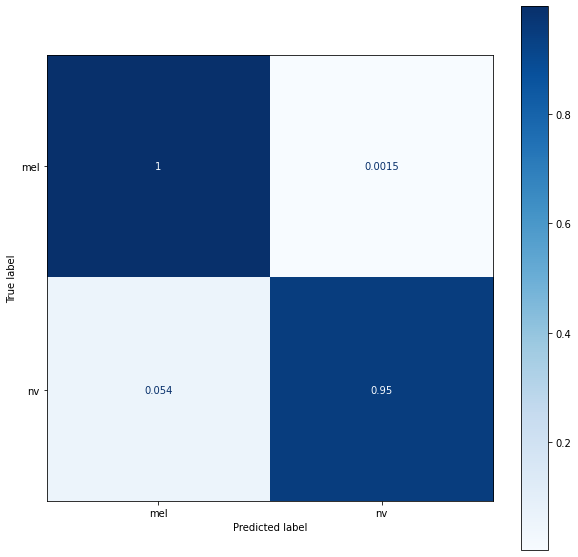

In [46]:
fig, ax = plt.subplots(figsize=(10, 10))
#plot_confusion_matrix(your_model, X_test, y_test, ax=ax)
disp = ConfusionMatrixDisplay.from_predictions(y_true, y_pred, normalize='true', 
                                               display_labels=test_df['dx'].unique(), ax=ax,
                                               #title="Confusion matrix categorical classification",
                                            cmap=plt.cm.Blues);




In [34]:
test_df['dx'].unique()

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype=object)

In [50]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
            TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
            FP += 1
        if y_actual[i]==y_pred[i]==0:
            TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
            FN += 1
    return (TP, FP, TN, FN)

In [51]:
perf_measure(y_true, y_pred)

(105, 1, 669, 6)